# Module 2: Data transform
## Data: discoveries, Boston

In [3]:
import numpy as np
import os.path as osp
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load discoveries data
# discoveries_path=osp.abspath('/discoveries.csv')
discoveries=pd.read_csv('discoveries.csv')

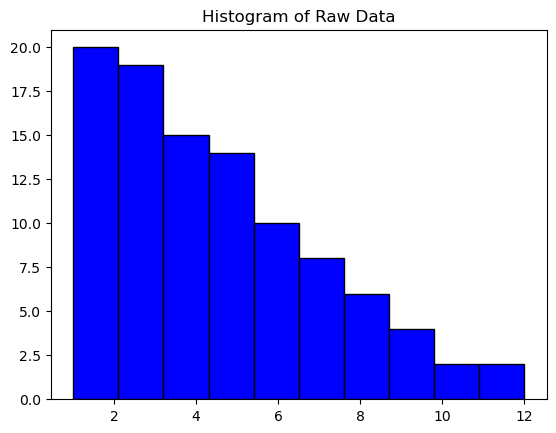

In [4]:
# Histogram of the raw data
plt.hist(discoveries, bins=10, color='blue', edgecolor='black')
plt.title("Histogram of Raw Data")
plt.show()

In [5]:
# show the log transform
np.log(discoveries)

,x
0,1.609438
1,2.397895
2,0.000000
3,2.197225
4,0.000000
...,...
95,0.000000
96,1.098612
97,1.609438
98,0.693147


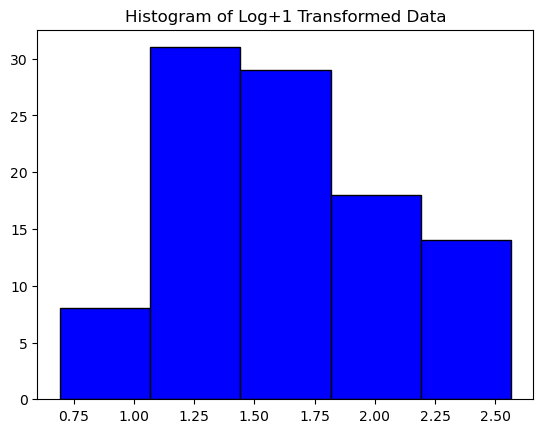

In [6]:
# Histogram of the log+1-transformed data
plt.hist(np.log(discoveries + 1), bins=5, color='blue', edgecolor='black')
plt.title("Histogram of Log+1 Transformed Data")
plt.show()

In [7]:
discoveries = np.array([5, 3, 0, 2, 0, 3, 2, 3, 6, 1, 2, 1, 2, 1, 3, 3, 3, 5, 2, 4,
                        4, 0, 2, 3, 7, 12, 3, 10, 9, 2, 3, 7, 7, 2, 3, 3, 6, 2, 4, 3,
                        5, 2, 2, 4, 0, 4, 2, 5, 2, 3, 3, 6, 5, 8, 3, 6, 6, 0, 5, 2,
                        2, 2, 6, 3, 4, 4, 2, 2, 4, 7, 5, 3, 3, 0, 2, 2, 2, 1, 3, 4,
                        2, 2, 1, 1, 1, 2, 1, 4, 4, 3, 2, 1, 4, 1, 1, 1, 0, 0, 2, 0])

A better way to check normality is qq-plot

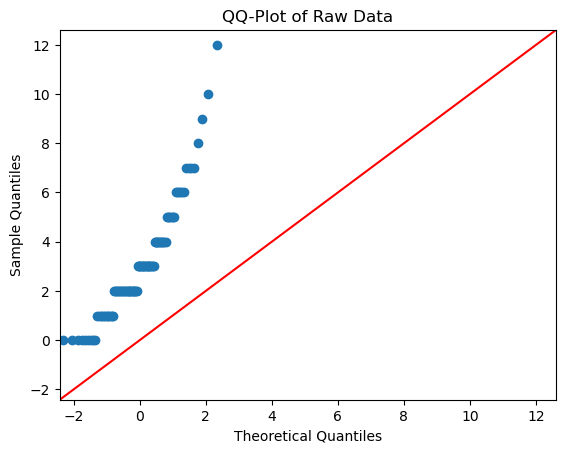

In [8]:
# QQ-plot of raw data
sm.qqplot(discoveries, line='45')
plt.title("QQ-Plot of Raw Data")
plt.show()

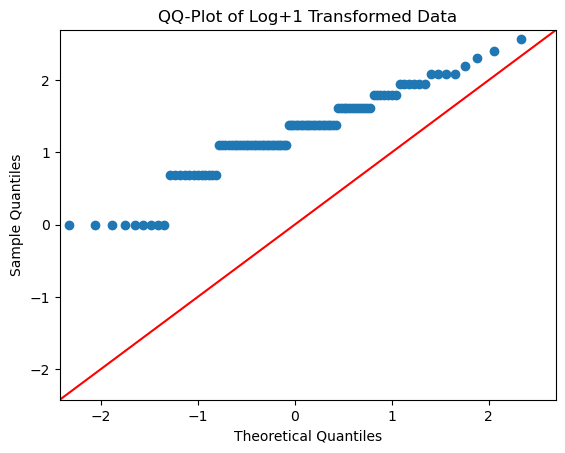

In [9]:
# QQ-plot of the log+1-transformed data
sm.qqplot(np.log(discoveries + 1), line='45')
plt.title("QQ-Plot of Log+1 Transformed Data")
plt.show()

log transform makes the data comply to the normal distribution requirement

# Module 3: Categorical predictors (ANOVA)
## Data: ANOVAExample1.rda

In [11]:
# !pip install pyreadr
# import pyreadr

# Reading an RDA file
data = pyreadr.read_r('ANOVAExample1.rda')

# Extract the DataFrame from the OrderedDict
data = data['Example1_data']
print(data)

    perchange treatment
0         2.0   NoPromo
1         6.0   NoPromo
2        -4.0   NoPromo
3        11.0        TV
4         4.0        TV
5         9.0        TV
6        -1.0        TV
7         5.0     Price
8        -2.0     Price
9         7.0     Price
10        3.0     Price


In [ ]:
import statsmodels.formula.api as smf

# Linear regression
model = smf.ols(formula="perchange ~ treatment", data=data)
result = model.fit()
# Print the summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              perchange   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.7549
Date:                Mon, 11 Sep 2023   Prob (F-statistic):              0.501
Time:                        00:23:29   Log-Likelihood:                -31.047
No. Observations:                  11   AIC:                             68.09
Df Residuals:                       8   BIC:                             69.29
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.3333      2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Module 4: Regularizations (LASSO and ridge)
## Data: Diamond

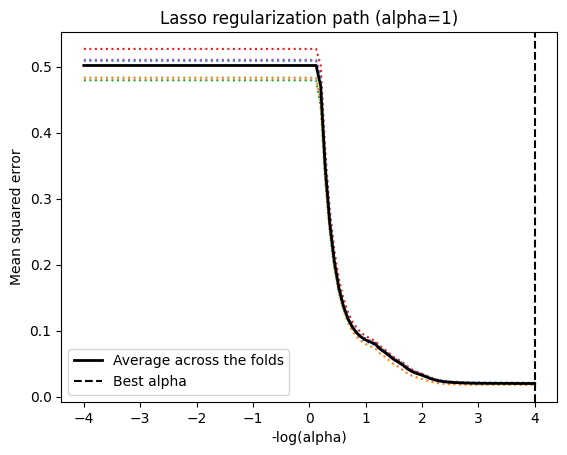

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV,Lasso
import matplotlib.pyplot as plt

# Load the Diamond data
diamond_data = pd.read_csv("diamond.csv")

# Split the data into training/testing sets
np.random.seed(6)
X = diamond_data.drop(columns=["Price"]).copy()
y = np.log(diamond_data['Price'].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

# Define columns to be one-hot encoded (categorical columns)
categorical_cols = ["Color", "Cut", "Clarity", "Polish"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)

# Create a pipeline for preprocessing and Lasso regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', lasso_cv)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)
#
# Plot the Lasso regularization path
m_log_alphas = -np.log10(lasso_cv.alphas_)
plt.figure()
plt.xlim(-8.5, -6)  # Set x-axis limits
plt.plot(m_log_alphas, lasso_cv.mse_path_, ':')
plt.plot(m_log_alphas, lasso_cv.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(lasso_cv.alpha_), linestyle='--', color='k', label='Best alpha')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Lasso regularization path (alpha=1)')
plt.axis('tight')

plt.show()


In [ ]:
# Best penalty lambda (alpha in scikit-learn's terminology)
best_alpha = pipeline.named_steps['lasso'].alpha_
print(f"Best penalty lambda (log): {np.log(best_alpha)}")

# Getting the coefficients
coefs = pipeline.named_steps['lasso'].coef_
intercept = pipeline.named_steps['lasso'].intercept_
print(f"Intercept: {intercept}")
print("Coefficients:")
print(coefs)

Best penalty lambda (log): -9.210340371976182
Intercept: 9.29739493683292
Coefficients:
[ 1.41938009e-03  6.47726634e-01  1.97423052e-01  1.06317099e-01
  8.61730142e-02 -4.41433100e-05 -1.31291675e-01 -2.65236517e-01
 -9.60976965e-02 -2.59400292e-02  3.60385203e-02  2.04354587e-01
  0.00000000e+00  3.45615876e-01  1.87237914e-01 -3.93960411e-01
 -1.40705472e-01 -2.29559802e-01  7.70572797e-02  0.00000000e+00
  2.72102532e-02 -1.57614623e-02  1.55035012e-02 -2.23606268e-03]


In [ ]:
# 1. Predicting the performance on the testing set
lasso_testing_predictions = np.exp(pipeline.predict(X_test))

# 2. Compute the Mean Squared Error (MSE)
lasso_testing_MSE = np.mean((lasso_testing_predictions - np.exp(y_test))**2)
print(f"MSE on the testing set: {lasso_testing_MSE}")

# 3. Compute the Mean Absolute Percentage Error (MAPE)
lasso_testing_MAPE = np.mean(np.abs((lasso_testing_predictions - np.exp(y_test)) / np.exp(y_test)) * 100)
print(f"MAPE on the testing set: {lasso_testing_MAPE}%")


MSE on the testing set: 10819927.948674176
MAPE on the testing set: 11.701877687565338%


Best penalty lambda (log): -1.3190688472428211
Intercept: 9.31581296962401
Coefficients:
[ 1.50018693e-03  6.47674824e-01  1.98605275e-01  1.08335097e-01
  8.78518965e-02  5.58414755e-04 -1.30659065e-01 -2.64691619e-01
 -1.22714183e-01 -4.98012260e-02  1.29797574e-02  1.82616076e-01
 -2.30804239e-02  4.38019267e-01  1.99027090e-01 -3.84237487e-01
 -1.31259790e-01 -2.19961729e-01  8.87267958e-02  9.68585382e-03
  2.11495818e-02 -2.25919274e-02  9.83853984e-03 -8.39619424e-03]


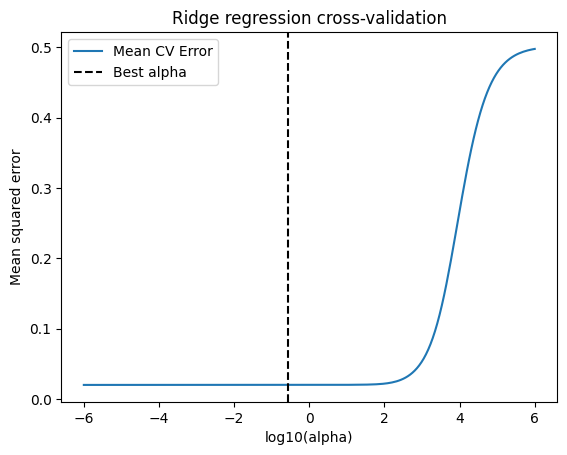

In [ ]:
from sklearn.linear_model import RidgeCV, Ridge
import matplotlib.pyplot as plt

alphas = np.logspace(-6, 6, 200)

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
# Create a pipeline for preprocessing and Lasso regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', ridge_cv)
])
pipeline.fit(X_train, y_train)

# The optimal alpha
penalty_ridge = ridge_cv.alpha_
print(f"Best penalty lambda (log): {np.log(penalty_ridge)}")

# Fitting Ridge regression with the best lambda
ridge_opt = Ridge(alpha=penalty_ridge)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', ridge_opt)
])
pipeline.fit(X_train, y_train)

# Getting the coefficients
ridge_coefs = ridge_opt.coef_
intercept = ridge_opt.intercept_
print(f"Intercept: {intercept}")
print("Coefficients:")
print(ridge_coefs)

# Plotting cross-validation results
mean_mse = np.mean(ridge_cv.cv_values_, axis=0)
plt.figure()
plt.plot(np.log10(alphas), mean_mse, label='Mean CV Error')
plt.axvline(np.log10(penalty_ridge), linestyle='--', color='k', label='Best alpha')
plt.legend()
plt.xlabel('log10(alpha)')
plt.ylabel('Mean squared error')
plt.title('Ridge regression cross-validation')
plt.show()


In [ ]:
# 1. Predicting the performance on the testing set using Ridge regression
X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)
ridge_testing_predictions = np.exp(ridge_opt.predict(X_test_preprocessed))

# reverted back the logarithmic transformation using np.exp for the true values.
true_values = np.exp(y_test)

# 2. Compute the Mean Squared Error (MSE)
ridge_testing_MSE = np.mean((ridge_testing_predictions - true_values)**2)
print(f"MSE on the testing set using Ridge regression: {ridge_testing_MSE}")

# 3. Compute the Mean Absolute Percentage Error (MAPE)
ridge_testing_MAPE = np.mean(np.abs((ridge_testing_predictions - true_values) / true_values) * 100)
print(f"MAPE on the testing set using Ridge regression: {ridge_testing_MAPE}%")


MSE on the testing set using Ridge regression: 10824989.200251097
MAPE on the testing set using Ridge regression: 11.705811170557931%


In [ ]:
# MODEL SELECTION: comparing the prediction error in the testing set
# LASSO is better, so use it for prediction

# Export the predictions to a csv file
lasso_predictions_df = pd.DataFrame(y_test, columns=['Predicted Prices'])
lasso_predictions_df.to_csv("Predicted Diamond Prices LOG INTERACTION LASSO.csv", index=False)
